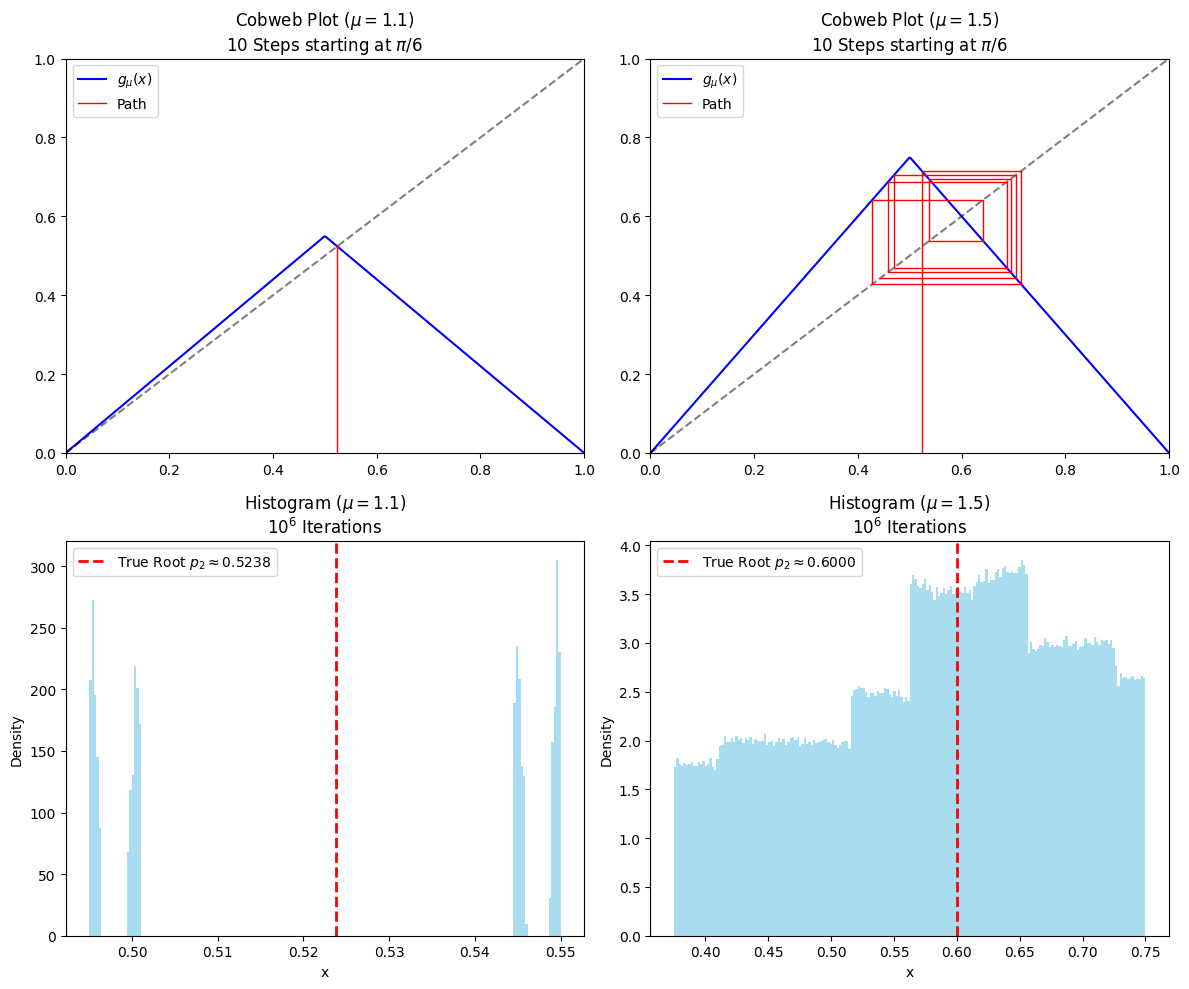

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def g(x, mu):
    return mu * (-np.abs(x - 0.5) + 0.5)

def run_simulation(mu, x0, iterations):
    history = np.zeros(iterations)
    x = x0
    for i in range(iterations):
        x = g(x, mu)
        history[i] = x
    return history

# Parameters
x0 = np.pi / 6
mu_values = [1.1, 1.5]
steps_cobweb = 10
steps_hist = 10**6

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, mu in enumerate(mu_values):
    # Calculate true root
    p2 = mu / (1 + mu)
    # --- COBWEB PLOTS (Top Row) ---
    ax_cb = axes[0, i]
    x_vals = np.linspace(0, 1, 500)
    ax_cb.plot(x_vals, [g(v, mu) for v in x_vals], 'b', label=f'$g_\\mu(x)$')
    ax_cb.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    
    # Generate cobweb path
    curr_x = x0
    px, py = [x0], [0]
    for _ in range(steps_cobweb):
        y_next = g(curr_x, mu)
        px.extend([curr_x, y_next])
        py.extend([y_next, y_next])
        curr_x = y_next
        
    ax_cb.plot(px, py, 'r', linewidth=1, label='Path')
    ax_cb.set_title(f'Cobweb Plot ($\\mu={mu}$)\n10 Steps starting at $\\pi/6$')
    ax_cb.set_xlim(0, 1)
    ax_cb.set_ylim(0, 1)
    ax_cb.legend(loc='upper left')

    # --- HISTOGRAMS (Bottom Row) ---
    ax_hist = axes[1, i]
    data = run_simulation(mu, x0, steps_hist)

    # Plot histogram
    ax_hist.hist(data, bins=200, color='skyblue', density=True, alpha=0.7)

    # Vertical line at true root
    ax_hist.axvline(p2, color='red', linestyle='--', linewidth=2,
                    label=f'True Root $p_2 \\approx {p2:.4f}$')
    ax_hist.set_title(f'Histogram ($\\mu={mu}$)\n$10^6$ Iterations')
    ax_hist.set_xlabel('x')
    ax_hist.set_ylabel('Density')
    ax_hist.legend()

plt.tight_layout()
plt.show()

Here, we see that neither converges, as we would expect a spike around the true root if they converged. 